## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
# from sklearn import datasets, svm, preprocessing
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error, classification_report
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import OneHotEncoder

## Data loading

In [2]:
df = pd.read_csv(os.getcwd()+"/pre_processing/dataset_traite.csv", sep=',', parse_dates=["DateTime"])

In [3]:
df.head()

DateTime  Global_active_power  Global_reactive_power  Voltage  \
0 2006-12-16 17:24:00                4.216                  0.418   234.84   
1 2006-12-16 17:25:00                5.360                  0.436   233.63   
2 2006-12-16 17:26:00                5.374                  0.498   233.29   
3 2006-12-16 17:27:00                5.388                  0.502   233.74   
4 2006-12-16 17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   DateTime               datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [5]:
df.describe()

Global_active_power  Global_reactive_power       Voltage  \
count         2.075259e+06           2.075259e+06  2.075259e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.050655e+00           1.120142e-01  3.219643e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.100000e-01           4.800000e-02  2.390200e+02   
50%           6.300000e-01           1.020000e-01  2.409600e+02   
75%           1.520000e+00           1.920000e-01  2.428600e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      2.075259e+06    2.075259e+06    2.075259e+06    2.075259e+06  
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00  
std        4.416490e+00    6.114397e+00    5.785470e+00    8.384178e+00  
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00  
25%        1.400000e+00    0.000000e+00    0.000000e+00    0.000000e+00  
50%        2.800000e+00    0.000000e+00    0.000000e+00    1.000000e+00  
75%        6.400000e+00    0.000000e+00    1.000000e+00    1.700000e+01  
max        4.840000e+01    8.800000e+01    8.000000e+01    3.100000e+01

In [6]:
df.corr()

Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.247017 -0.399762   
Global_reactive_power             0.247017               1.000000 -0.112246   
Voltage                          -0.399762              -0.112246  1.000000   
Global_intensity                  0.998889               0.266120 -0.411363   
Sub_metering_1                    0.484401               0.123111 -0.195976   
Sub_metering_2                    0.434569               0.139231 -0.167405   
Sub_metering_3                    0.638555               0.089617 -0.268172   

                       Global_intensity  Sub_metering_1  Sub_metering_2  \
Global_active_power            0.998889        0.484401        0.434569   
Global_reactive_power          0.266120        0.123111        0.139231   
Voltage                       -0.411363       -0.195976       -0.167405   
Global_intensity               1.000000        0.489298        0.440347   
Sub_metering_1                 0.489298        1.000000        0.054721   
Sub_metering_2                 0.440347        0.054721        1.000000   
Sub_metering_3                 0.626543        0.102571        0.080872   

                       Sub_metering_3  
Global_active_power          0.638555  
Global_reactive_power        0.089617  
Voltage                     -0.268172  
Global_intensity             0.626543  
Sub_metering_1               0.102571  
Sub_metering_2               0.080872  
Sub_metering_3               1.000000

## Data viz

In [7]:
active_power_df = df[['DateTime', 'Global_active_power']]
active_power_df = active_power_df.loc[active_power_df["DateTime"].dt.year == 2007]
active_power_df.set_index('DateTime', inplace=True)
active_power_df

Global_active_power
DateTime                                
2007-01-01 00:00:00                2.580
2007-01-01 00:01:00                2.552
2007-01-01 00:02:00                2.550
2007-01-01 00:03:00                2.550
2007-01-01 00:04:00                2.554
...                                  ...
2007-12-31 23:55:00                1.746
2007-12-31 23:56:00                1.732
2007-12-31 23:57:00                1.732
2007-12-31 23:58:00                1.684
2007-12-31 23:59:00                1.628

[525600 rows x 1 columns]

#### Average global active power (in watt) per week in 2007

<AxesSubplot:title={'center':'Average global active power (in watt) per week in 2007'}, xlabel='DateTime'>

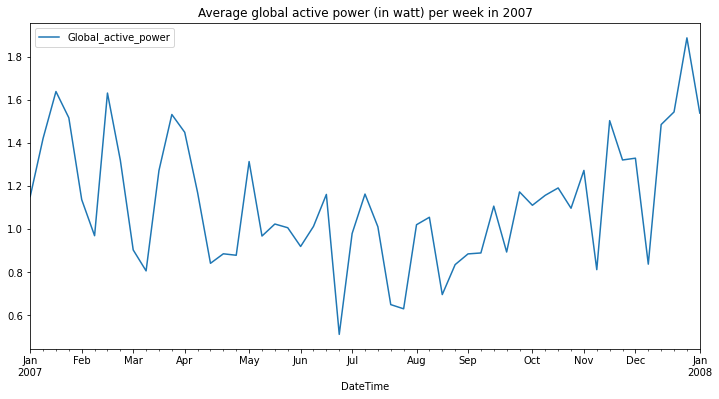

In [8]:
weekly_avg = active_power_df.resample("W").mean()
weekly_avg.plot(figsize=(12,6), title="Average global active power (in watt) per week in 2007")

#### Moving average of the daily average global active power (in watt) in 2007

<AxesSubplot:xlabel='DateTime'>

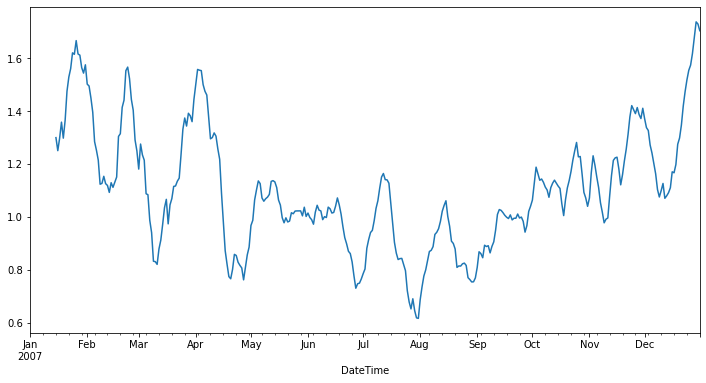

In [9]:
daily_avg = active_power_df.resample("D").mean()

sma_length = 15
sma = daily_avg["Global_active_power"].rolling(window=sma_length).mean()
sma.plot(figsize=(12,6))
# sma

#### Global active power per hour of the day in 2007

<AxesSubplot:title={'center':'Global active power per hour of the day in 2007'}, xlabel='DateTime'>

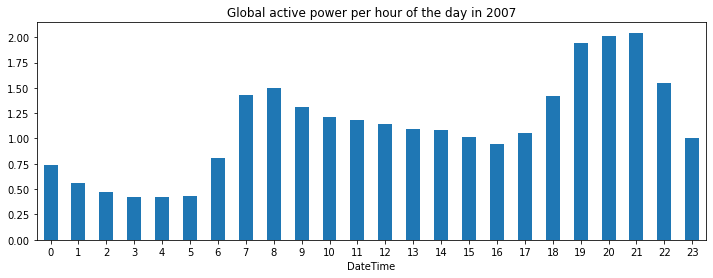

In [10]:
fig, axs = plt.subplots(figsize=(12, 4))

active_power_df.groupby(active_power_df.index.hour)["Global_active_power"].mean().plot(kind='bar', rot=0, ax=axs, title="Global active power per hour of the day in 2007")

#### Sub metering 1 (kitchen) per hour of the day

AttributeError: 'Line2D' object has no property 'kind'

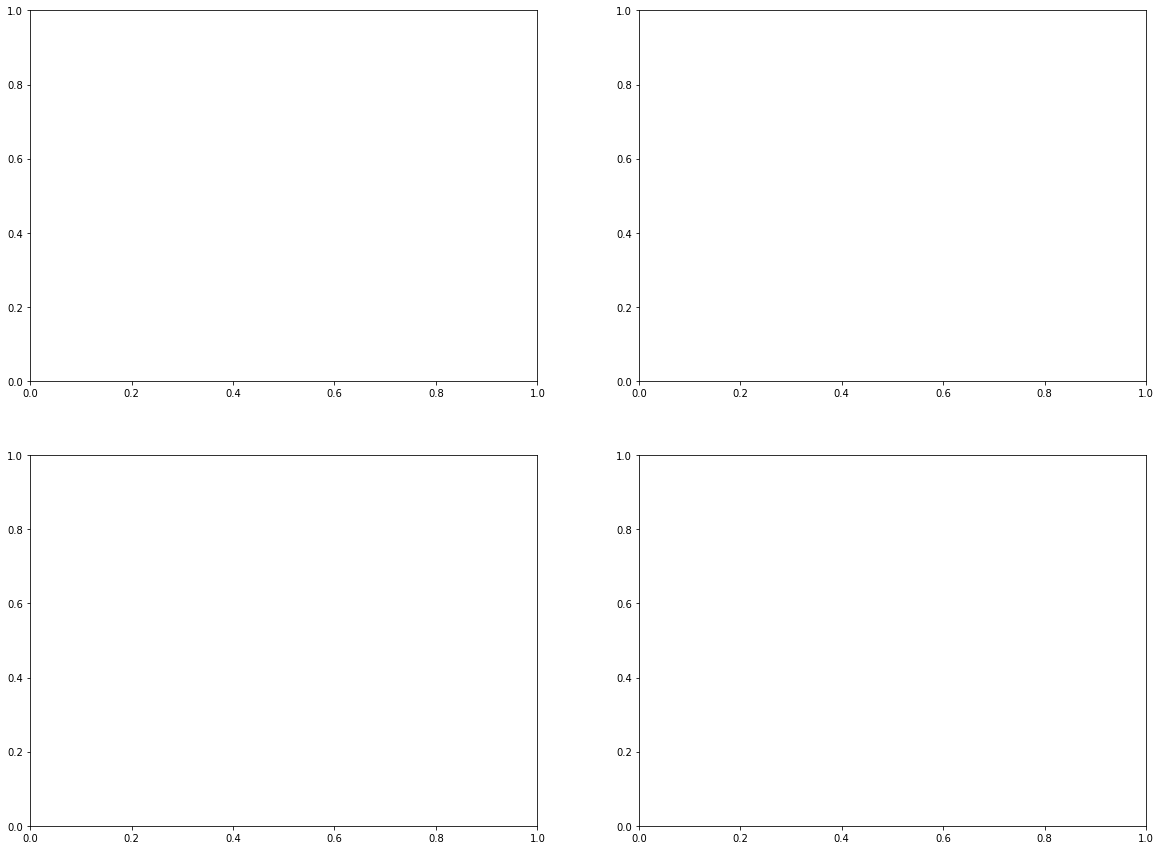

In [12]:
from vacances_scolaires_france import SchoolHolidayDates
import datetime
d = SchoolHolidayDates()
dict_holidays = d.holidays_for_year_and_zone(2007, 'C')
holidays = dict_holidays.keys()

fig, axs = plt.subplots(2,2,figsize=(20, 15))

sub1_df = df[['DateTime', 'Sub_metering_1']]

sub1_df_all = sub1_df.loc[sub1_df["DateTime"].dt.year == 2007]
sub1_df_all.set_index('DateTime', inplace=True)
axs[0,0].plot(sub1_df_all.groupby(sub1_df_all.index.hour)["Sub_metering_1"].mean(),kind='bar', rot=0)

sub1_df_bd = sub1_df.loc[(sub1_df["DateTime"].dt.year == 2007) & (sub1_df["DateTime"].dt.weekday != 5) & (sub1_df["DateTime"].dt.weekday != 6) & (sub1_df["DateTime"].dt.date.isin(holidays)==False)]
sub1_df_bd.set_index('DateTime', inplace=True)
axs[0,1].plot(sub1_df_bd.groupby(sub1_df_bd.index.hour)["Sub_metering_1"].mean(),kind='bar', rot=0)

sub1_df_we = sub1_df.loc[(sub1_df["DateTime"].dt.year == 2007) & (sub1_df["DateTime"].dt.weekday.isin([5,6]))]
sub1_df_we.set_index('DateTime', inplace=True)
axs[1,0].plot(sub1_df_we.groupby(sub1_df_we.index.hour)["Sub_metering_1"].mean(),kind='bar', rot=0)

sub1_df_hd = sub1_df.loc[(sub1_df["DateTime"].dt.year == 2007) & (sub1_df["DateTime"].dt.date.isin(holidays))]
sub1_df_hd.set_index('DateTime', inplace=True)
axs[1,1].plot(sub1_df_hd.groupby(sub1_df_hd.index.hour)["Sub_metering_1"].mean(),kind='bar', rot=0)

#### Sub metering 1 (kitchen) per hour of the business days

<AxesSubplot:xlabel='DateTime'>

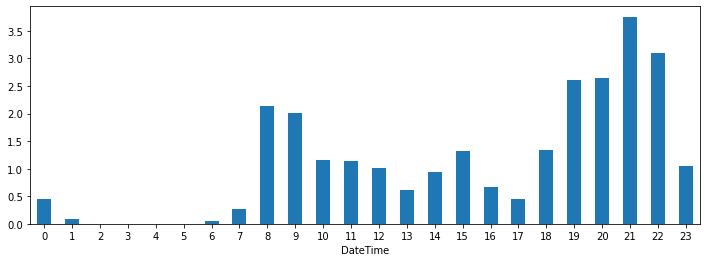

In [ ]:

d = SchoolHolidayDates()
dict_holidays = d.holidays_for_year_and_zone(2007, 'C')
holidays = dict_holidays.keys()
sub1_df_bd = sub1_df.loc[(sub1_df["DateTime"].dt.year == 2007) & (sub1_df["DateTime"].dt.weekday != 5) & (sub1_df["DateTime"].dt.weekday != 6) & (sub1_df["DateTime"].dt.date.isin(holidays)==False)]
sub1_df_bd.set_index('DateTime', inplace=True)
fig, axs = plt.subplots(figsize=(12, 4))

sub1_df_bd.groupby(sub1_df_bd.index.hour)["Sub_metering_1"].mean().plot(kind='bar', rot=0, ax=axs)

#### Sub metering 1 per hour on the weekends

<AxesSubplot:xlabel='DateTime'>

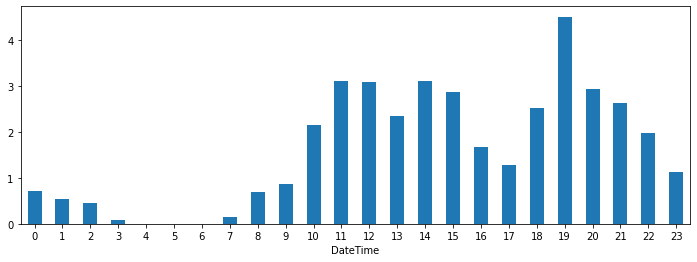

In [ ]:
sub1_df_we = sub1_df.loc[(sub1_df["DateTime"].dt.year == 2007) & (sub1_df["DateTime"].dt.weekday.isin([5,6]))]
sub1_df_we.set_index('DateTime', inplace=True)
fig, axs = plt.subplots(figsize=(12, 4))

sub1_df_we.groupby(sub1_df_we.index.hour)["Sub_metering_1"].mean().plot(kind='bar', rot=0, ax=axs)

#### Sub metering 1 per hour of the holidays

<AxesSubplot:xlabel='DateTime'>

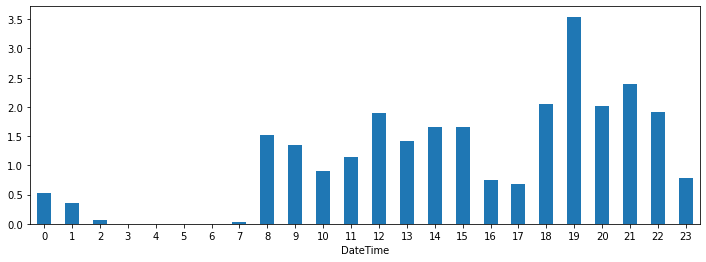

In [ ]:
sub1_df_hd = sub1_df.loc[(sub1_df["DateTime"].dt.year == 2007) & (sub1_df["DateTime"].dt.date.isin(holidays))]
sub1_df_hd.set_index('DateTime', inplace=True)

fig, axs = plt.subplots(figsize=(12, 4))
sub1_df_hd.groupby(sub1_df_hd.index.hour)["Sub_metering_1"].mean().plot(kind='bar', rot=0, ax=axs)

#### Sub metering 1 per minute

<AxesSubplot:xlabel='DateTime'>

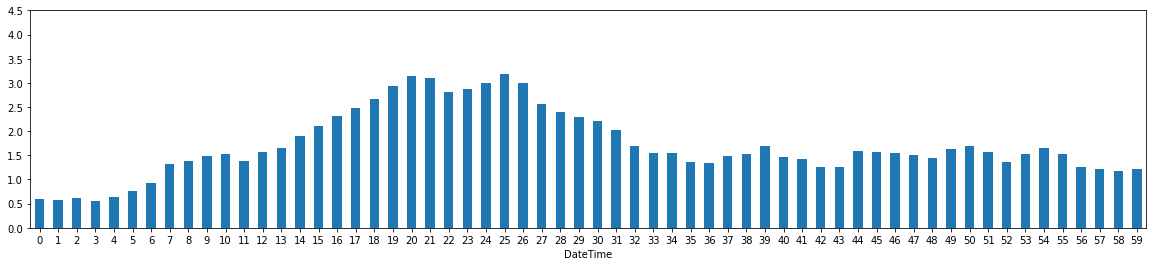

In [ ]:
fig, axs = plt.subplots(figsize=(20, 4))
axs.set_ylim([0, 4.5])
sub1_df_all.groupby([sub1_df_all.index.hour, sub1_df_all.index.minute])["Sub_metering_1"].mean()[8].plot(kind='bar', rot=0, ax=axs)

#### Sub metering 1 per minute on business days

<AxesSubplot:xlabel='DateTime'>

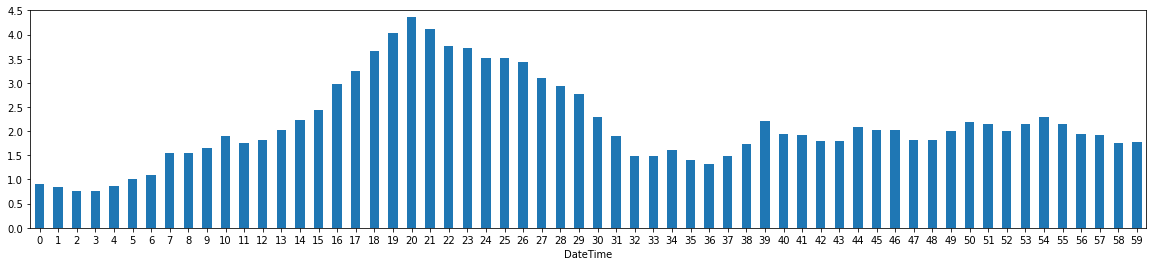

In [ ]:
fig, axs = plt.subplots(figsize=(20, 4))
axs.set_ylim([0, 4.5])
sub1_df_bd.groupby([sub1_df_bd.index.hour, sub1_df_bd.index.minute])["Sub_metering_1"].mean()[8].plot(kind='bar', rot=0, ax=axs)

#### Sub metering 1 per minute on weekends

<AxesSubplot:xlabel='DateTime'>

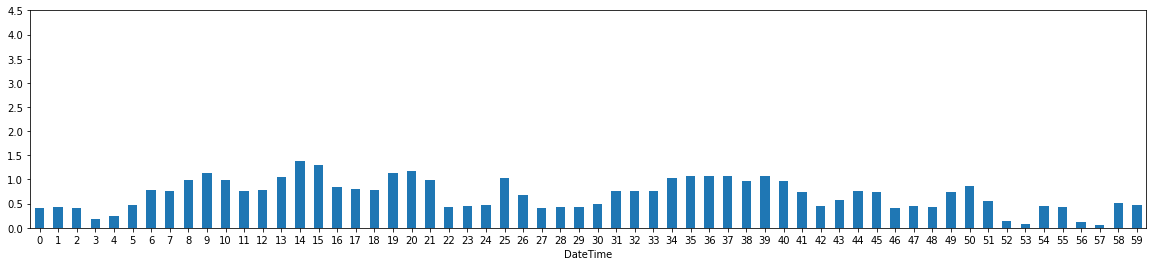

In [ ]:
fig, axs = plt.subplots(figsize=(20, 4))
axs.set_ylim([0, 4.5])
sub1_df_we.groupby([sub1_df_we.index.hour, sub1_df_we.index.minute])["Sub_metering_1"].mean()[8].plot(kind='bar', rot=0, ax=axs)

#### Sub metering 1 per minute on holidays

<AxesSubplot:xlabel='DateTime'>

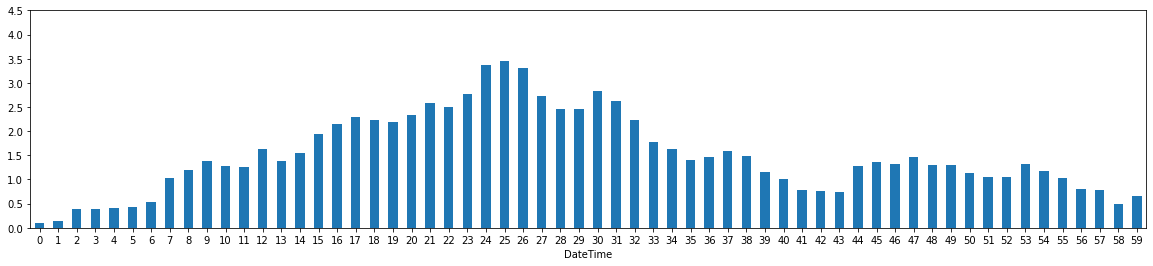

In [ ]:
fig, axs = plt.subplots(figsize=(20, 4))
axs.set_ylim([0, 4.5])
sub1_df_hd.groupby([sub1_df_hd.index.hour, sub1_df_hd.index.minute])["Sub_metering_1"].mean()[8].plot(kind='bar', rot=0, ax=axs)

<AxesSubplot:xlabel='DateTime'>

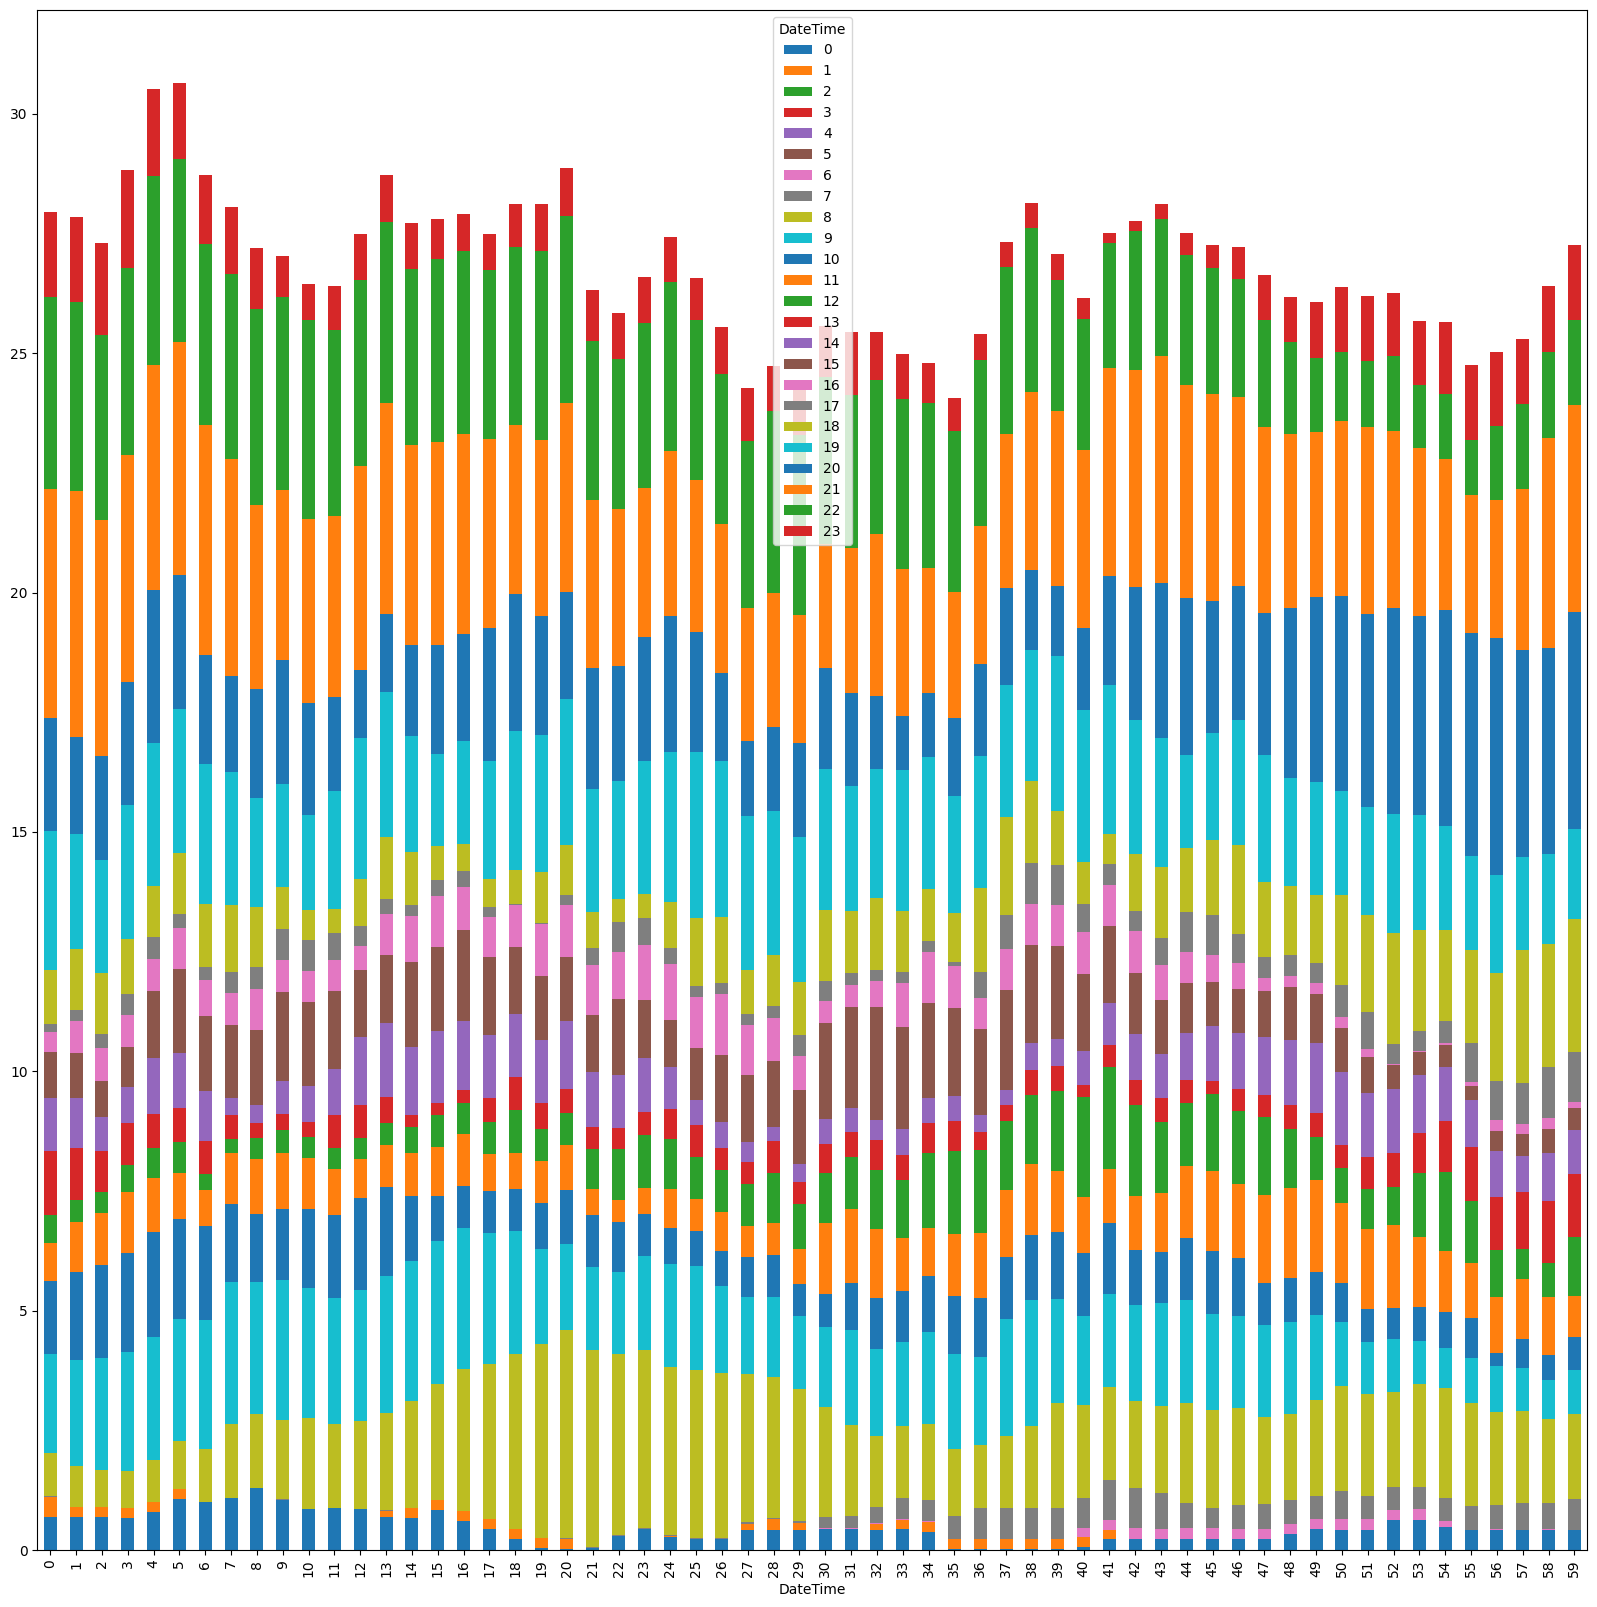

In [ ]:
import matplotlib
matplotlib.style.use('default')
group2 = sub1_df_bd.groupby([sub1_df_bd.index.hour, sub1_df_bd.index.minute])["Sub_metering_1"].mean().unstack().transpose()
group2.plot(kind="bar", stacked=True,figsize=(20,20))


#### work in progress

In [ ]:
sub1_df_bd_march = sub1_df_bd.loc[(sub1_df["DateTime"].dt.month == 3)]
cumul

# fig, axs = plt.subplots(figsize=(20, 4))
# axs.set_ylim([0, 13])
# sub1_df_bd.groupby([sub1_df_bd.index.hour, sub1_df_bd.index.minute])["Sub_metering_1"].mean()[7].plot(kind='bar', rot=0, ax=axs)

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

Interpretation of the plot :
Sharp increase of power consumption around 8am, implies that the famsilly wakes up around 8 on week days

#### Sub metering 1 per hour of the weekend days

### partie de theophile

In [ ]:
df_copy2 = df.copy().loc[df["DateTime"].dt.year == 2008]
df_copy2.index = pd.to_datetime(df_copy2['DateTime'])
df_copy2 = df_copy2.drop(['DateTime'], axis=1)
daily_avg = df_copy2.resample("D").mean()


In [ ]:
temp_2008 = pd.read_csv("pre_processing/temperatures_2008.csv", sep=',', parse_dates=["Date"])
temp_2008 = temp_2008.set_index(daily_avg.index)
temp_2008 = temp_2008.drop(['Date'], axis = 1)
temp_2008.head()

min_t  max_t
DateTime                
2008-01-01    3.6    6.3
2008-01-02    0.1    2.7
2008-01-03   -1.4    6.1
2008-01-04    4.2   10.3
2008-01-05    6.2    9.5

In [ ]:
print(daily_avg.shape)
print(temp_2008.shape)

(366, 7)
(366, 2)


In [ ]:
daily_avg['min_temp'] = temp_2008['min_t']
daily_avg['max_temp'] = temp_2008['max_t']
daily_avg.head(100)

Global_active_power  Global_reactive_power     Voltage  \
DateTime                                                             
2008-01-01             1.916485               0.098964  241.036674   
2008-01-02             1.065731               0.124479  240.360271   
2008-01-03             0.792969               0.073026  239.431514   
2008-01-04             1.478508               0.118331  241.615806   
2008-01-05             0.400010               0.104650  241.446264   
...                         ...                    ...         ...   
2008-04-05             1.021507               0.145432  241.380479   
2008-04-06             1.103411               0.105836  234.706472   
2008-04-07             0.654181               0.130647  240.179653   
2008-04-08             0.782432               0.134552  237.863461   
2008-04-09             0.850847               0.105467  238.663493   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
DateTime                                                                       
2008-01-01          7.978611        1.709028        1.902083        8.579861   
2008-01-02          4.517639        0.233333        0.194444        5.028472   
2008-01-03          3.277639        0.000000        0.893750        1.891667   
2008-01-04          6.202500        0.749306        4.622917       10.079861   
2008-01-05          1.702361        0.000000        0.368056        1.795833   
...                      ...             ...             ...             ...   
2008-04-05          4.362500        1.525000        1.994444        3.794444   
2008-04-06          4.827778        1.076389        5.334722        4.519444   
2008-04-07          2.828333        0.000000        0.409028        5.765278   
2008-04-08          3.417234        0.414177        3.250174        3.064628   
2008-04-09          3.654722        1.545139        0.280556        6.533333   

            min_temp  max_temp  
DateTime                        
2008-01-01       3.6       6.3  
2008-01-02       0.1       2.7  
2008-01-03      -1.4       6.1  
2008-01-04       4.2      10.3  
2008-01-05       6.2       9.5  
...              ...       ...  
2008-04-05       8.4      11.4  
2008-04-06       2.3       9.8  
2008-04-07       0.0       9.8  
2008-04-08       1.8       9.3  
2008-04-09       5.5       9.6  

[100 rows x 9 columns]

Global electic consumption = -0.01970275381965202*x + 1.3178072418696063


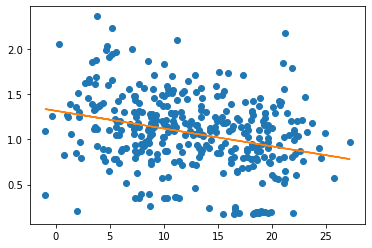

In [ ]:
x = (daily_avg['max_temp']+daily_avg['min_temp'])/2
y = daily_avg['Global_active_power']

m, b = np.polyfit(x, y, 1)
print('Global electic consumption = {}*x + {}'.format(m,b)) 

plt.plot(x,y, linestyle='None',marker='o')
plt.plot(x, m*x+b)

active energy of non measured electic devices = -0.28318248318979644*x + 12.999537826740754


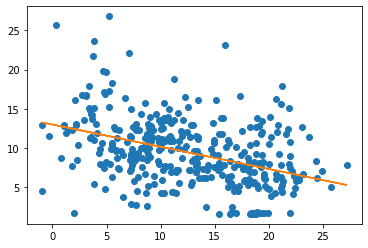

In [ ]:
x = (daily_avg['max_temp']+daily_avg['min_temp'])/2
y = (daily_avg['Global_active_power']*1000/60)-daily_avg['Sub_metering_1']-daily_avg['Sub_metering_2']-daily_avg['Sub_metering_3']

m, b = np.polyfit(x, y, 1)
print('active energy of non measured electic devices = {}*x + {}'.format(m,b)) 

plt.plot(x,y, linestyle='None',marker='o')
plt.plot(x, m*x+b)

active energy of non measured electic devices + sub3= -0.32549873348634073*x + 19.5613702179474


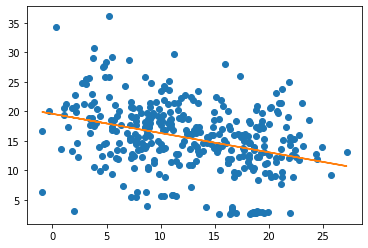

In [ ]:
x = (daily_avg['max_temp']+daily_avg['min_temp'])/2
y = (daily_avg['Global_active_power']*1000/60)-daily_avg['Sub_metering_1']-daily_avg['Sub_metering_2']

m, b = np.polyfit(x, y, 1)
print('active energy of non measured electic devices + sub3= {}*x + {}'.format(m,b)) 

plt.plot(x,y, linestyle='None',marker='o')
plt.plot(x, m*x+b)

In [ ]:
def subplot_coord(x,y,param="all"):
    tuples =[]
    if param=="all":
        for i in range(x+1):
            for j in range(y+1):
                tuples.append((i,j))
    elif param=="line":
        for j in range(y+1):
                tuples.append((x,j))
    elif param=="line":
        for i in range(x+1):
                tuples.append((i,y))
    return tuples  

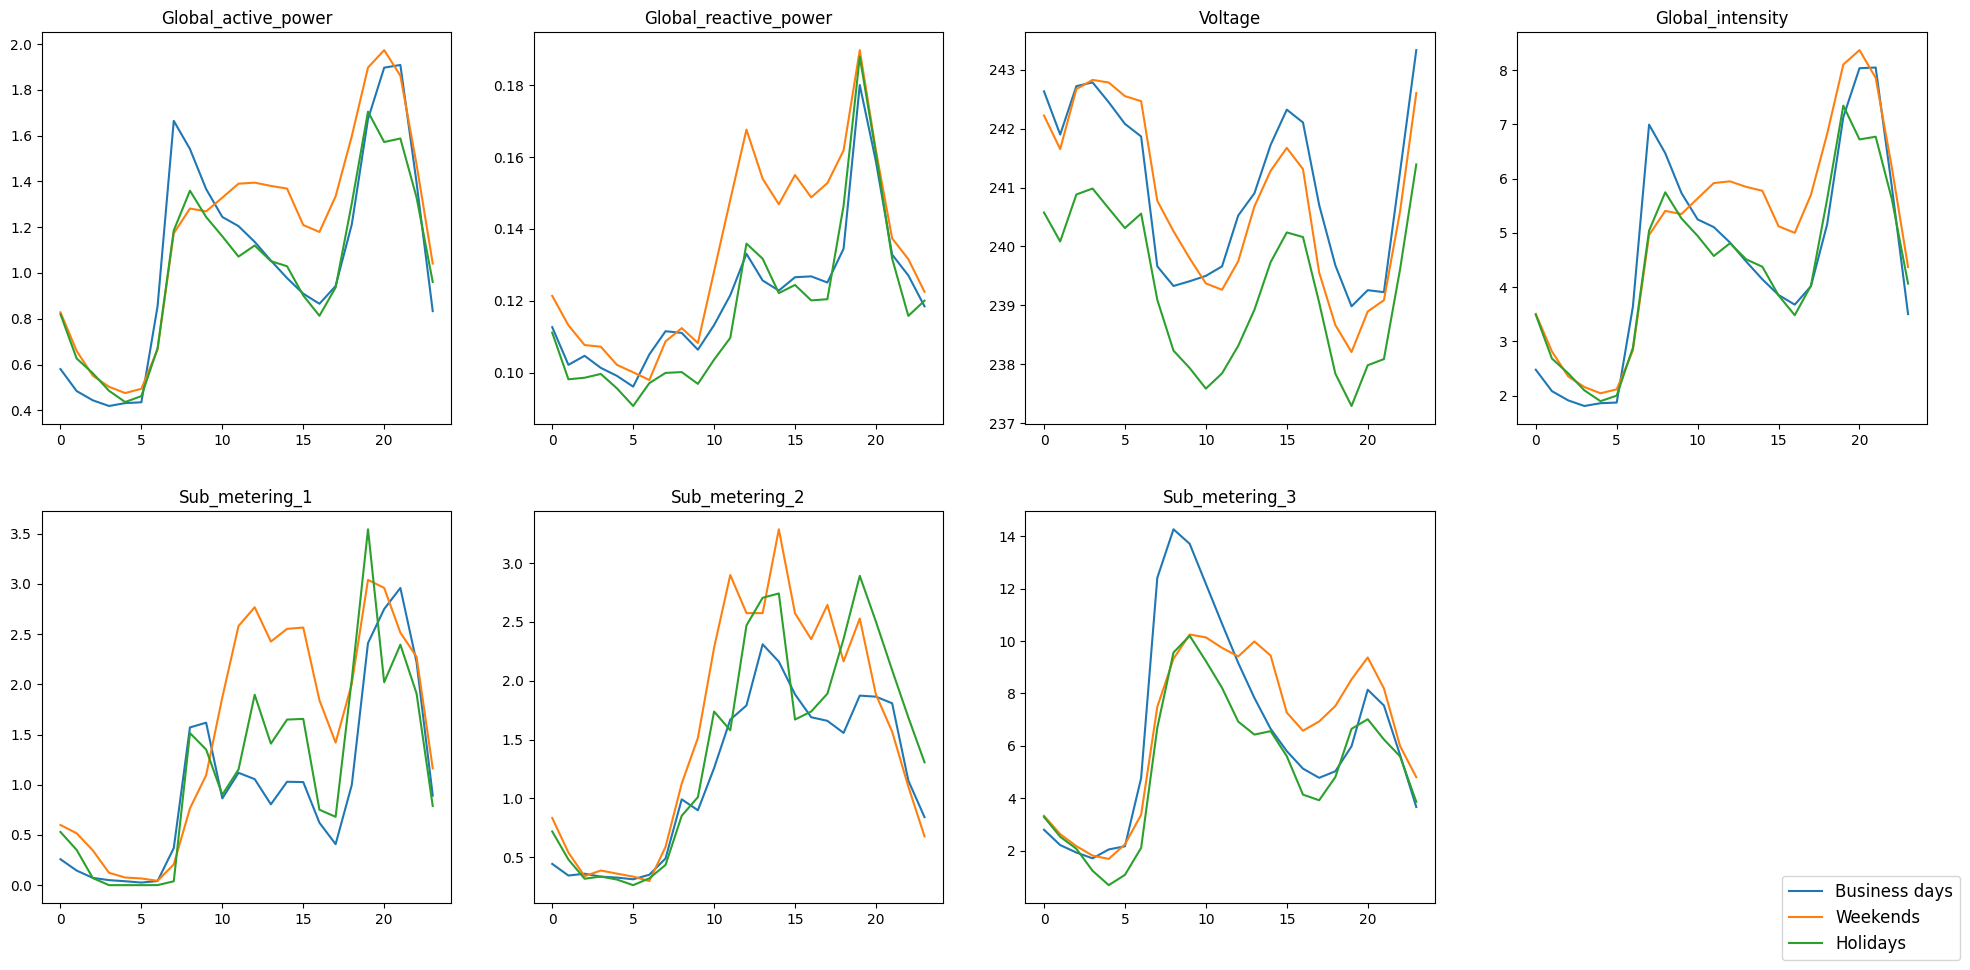

In [ ]:
fig, axis = plt.subplots(2,4,figsize=(20, 10))
fig.delaxes(axis[1,3])
indexes = [(0,0),(0,1),(0,2),(0,3),(1,0),(1,1),(1,2)]
variables = list(df.columns)
variables.remove('DateTime')
data_bd = df.loc[(df["DateTime"].dt.weekday != 5) & (df["DateTime"].dt.weekday !=6) & (df["DateTime"].dt.date.isin(holidays)==False)]
data_we = df.loc[(df["DateTime"].dt.weekday == 5) | (df["DateTime"].dt.weekday ==6)]
data_hd = df.loc[(df["DateTime"].dt.date.isin(holidays))]


for idx, val in enumerate(indexes):
    temp_bd=data_bd[['DateTime',variables[idx]]]
    temp_we=data_we[['DateTime',variables[idx]]]
    temp_hd=data_hd[['DateTime',variables[idx]]]
    axis[val[0],val[1]].plot(temp_bd.groupby(temp_bd['DateTime'].dt.hour)[variables[idx]].mean())
    axis[val[0],val[1]].plot(temp_we.groupby(temp_we['DateTime'].dt.hour)[variables[idx]].mean())
    axis[val[0],val[1]].plot(temp_hd.groupby(temp_hd['DateTime'].dt.hour)[variables[idx]].mean())
    axis[val[0],val[1]].set_title(variables[idx])
        
fig.tight_layout(pad=3.0)
fig.legend(['Business days', 'Weekends', 'Holidays'],loc=4, bbox_to_anchor=(0.5, 0., 0.5, 0.5),fontsize="large")
fig.show()

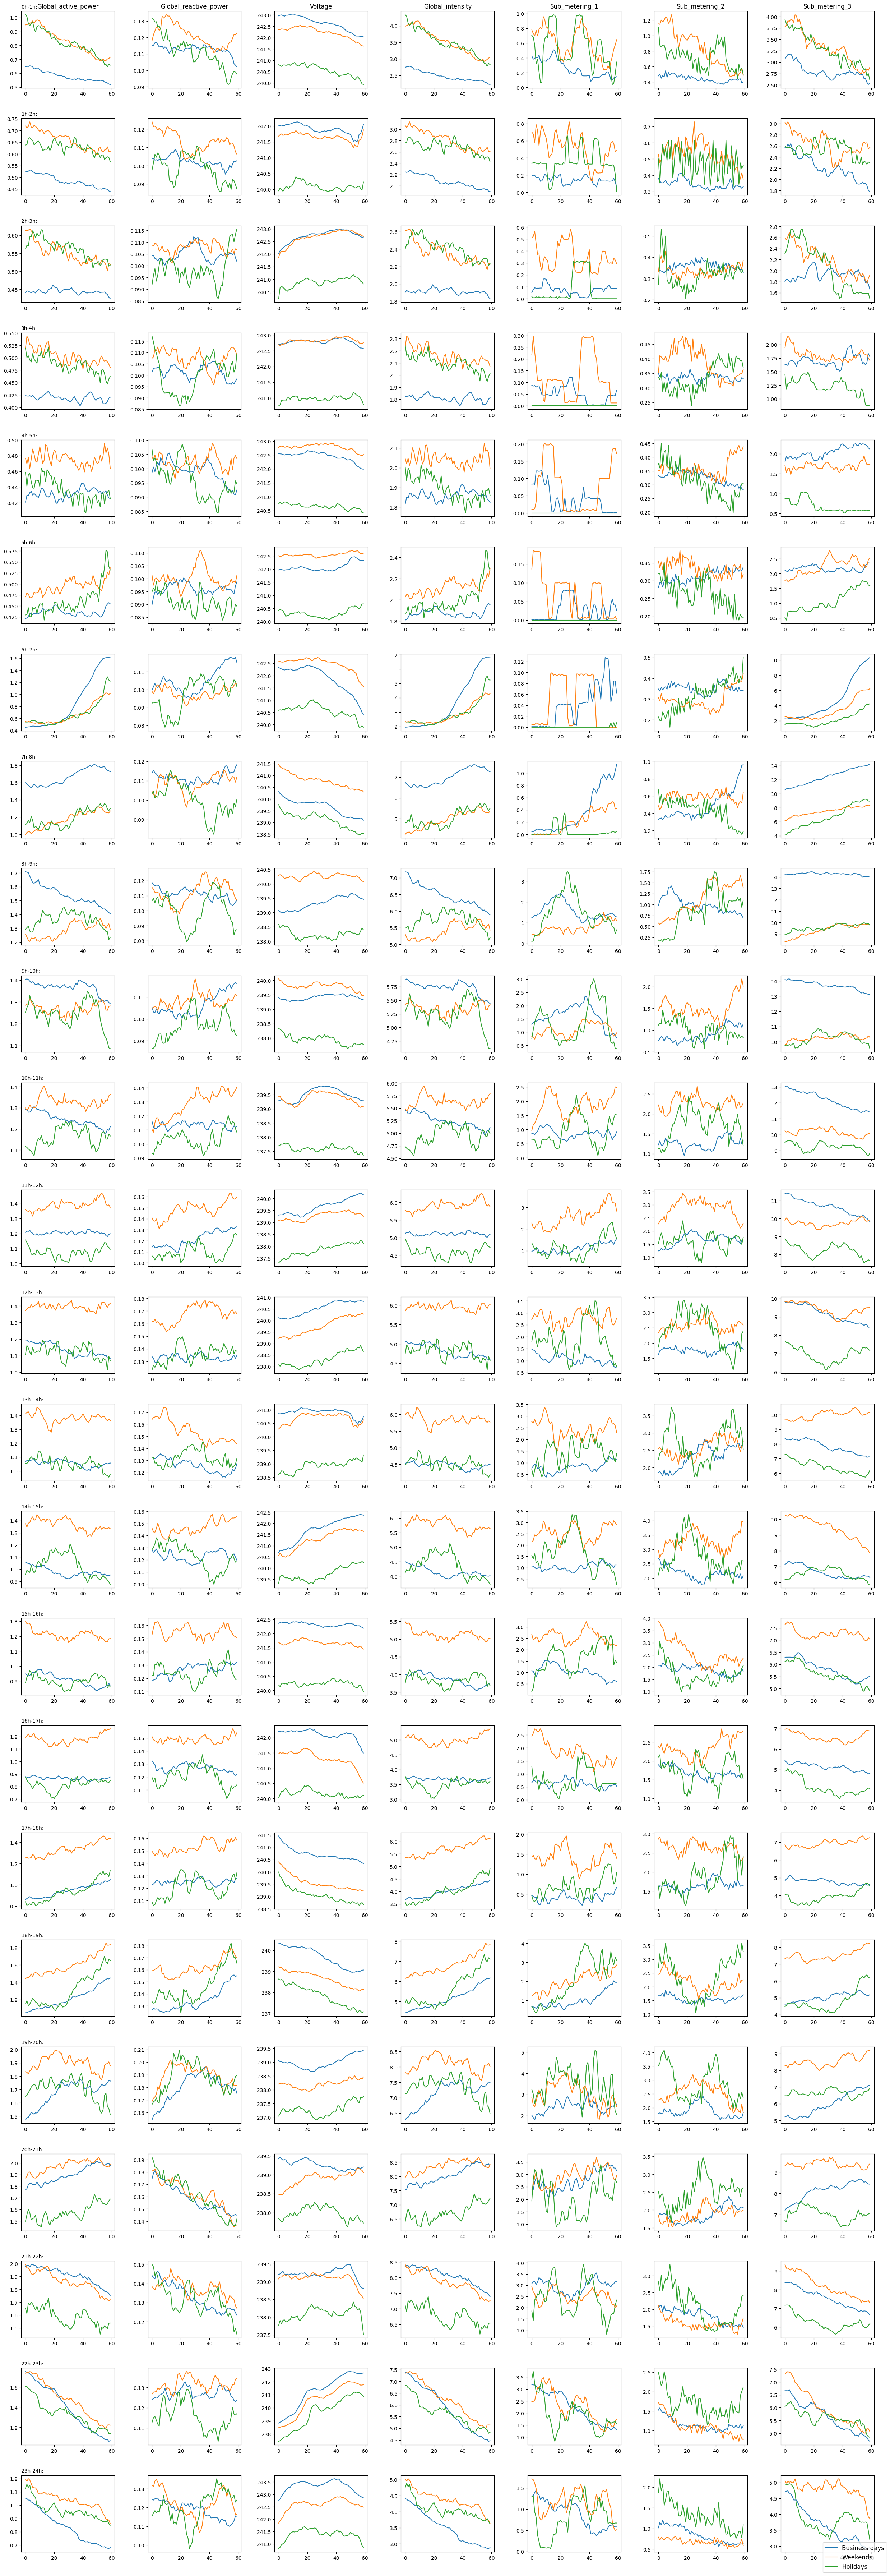

In [ ]:
fig, axis = plt.subplots(24,7,figsize=(25, 72))

hour = 0
variables = list(df.columns)
variables.remove('DateTime')
data_bd = df.loc[(df["DateTime"].dt.weekday != 5) & (df["DateTime"].dt.weekday !=6) & (df["DateTime"].dt.date.isin(holidays)==False)]
data_we = df.loc[(df["DateTime"].dt.weekday == 5) | (df["DateTime"].dt.weekday ==6)]
data_hd = df.loc[(df["DateTime"].dt.date.isin(holidays))]

for i in range(24):
    indexes = subplot_coord(i,6,"line")
    for idx, val in enumerate(indexes):
        temp_bd=data_bd[['DateTime',variables[idx]]].loc[(data_bd["DateTime"].dt.hour ==i)]
        temp_we=data_we[['DateTime',variables[idx]]].loc[(data_we["DateTime"].dt.hour ==i)]
        temp_hd=data_hd[['DateTime',variables[idx]]].loc[(data_hd["DateTime"].dt.hour ==i)]
        axis[val[0],val[1]].plot(temp_bd.groupby(temp_bd['DateTime'].dt.minute)[variables[idx]].mean())
        axis[val[0],val[1]].plot(temp_we.groupby(temp_we['DateTime'].dt.minute)[variables[idx]].mean())
        axis[val[0],val[1]].plot(temp_hd.groupby(temp_hd['DateTime'].dt.minute)[variables[idx]].mean())
        if val[0]==0:
            axis[val[0],val[1]].set_title(variables[idx], fontsize=10)
        if val[1]==0:
            axis[val[0],val[1]].set_title("{0}h-{1}h:".format(i,i+1), loc="left", fontsize=12)

fig.tight_layout(pad=3.0)
fig.legend(['Business days', 'Weekends', 'Holidays'],loc=4, bbox_to_anchor=(0.5, 0., 0.5, 0.5),fontsize="large")
fig.show()

## LSTM PREDICTION

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error,r2_score
from tensorflow.keras.callbacks import TensorBoard

2021-12-01 23:17:47.203901: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-01 23:17:47.203920: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Preprocessing du df

In [ ]:
def data_to_supervised(df):
    data = pd.DataFrame(df)
    n_vars = data.shape[1]
    columns = []
    columns.append(data.shift(0))
    # temp = data.shift(0)
    columns.append(data.shift(-1)["Global_active_power"])
    df_labeled = pd.concat(columns, axis=1)
    names = ['gapow(t-1)', 'grpow(t-1)', 'volt(t-1)', 'int(t-1)', 'sub1(t-1)', 'sub2(t-1)', 'sub3(t-1)', 'gapow(t)']
    df_labeled.columns = names
    df_labeled.dropna(inplace=True)
    
    return df_labeled

In [ ]:
df_lstm = df.set_index('DateTime')
df_lstm = df_lstm.resample('h').mean()
df_lstm['Date'] = pd.to_datetime(df_lstm.index.date)
df_lstm.head(3)

Global_active_power  Global_reactive_power     Voltage  \
DateTime                                                                      
2006-12-16 17:00:00             4.222889               0.229000  234.643889   
2006-12-16 18:00:00             3.632200               0.080033  234.580167   
2006-12-16 19:00:00             3.400233               0.085233  233.232500   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
DateTime                                                                
2006-12-16 17:00:00         18.100000             0.0        0.527778   
2006-12-16 18:00:00         15.600000             0.0        6.716667   
2006-12-16 19:00:00         14.503333             0.0        1.433333   

                     Sub_metering_3       Date  
DateTime                                        
2006-12-16 17:00:00       16.861111 2006-12-16  
2006-12-16 18:00:00       16.866667 2006-12-16  
2006-12-16 19:00:00       16.683333 2006-12-16

In [ ]:
temperatures = pd.read_csv("pre_processing/temperatures.csv", parse_dates=['Date'], index_col='Date')
temperatures['avg_t'] = (temperatures['max_t'] - temperatures['min_t'])/2
temperatures.head(2)

min_t  max_t  avg_t
Date                           
2006-01-02    3.0    7.6   2.30
2006-01-03    3.9    6.8   1.45

In [ ]:
df_lstm = df_lstm.join(temperatures, how="left", on='Date')
df_lstm = df_lstm.drop(columns=['Date','max_t','min_t'])
df_lstm.head(3)

Global_active_power  Global_reactive_power     Voltage  \
DateTime                                                                      
2006-12-16 17:00:00             4.222889               0.229000  234.643889   
2006-12-16 18:00:00             3.632200               0.080033  234.580167   
2006-12-16 19:00:00             3.400233               0.085233  233.232500   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
DateTime                                                                
2006-12-16 17:00:00         18.100000             0.0        0.527778   
2006-12-16 18:00:00         15.600000             0.0        6.716667   
2006-12-16 19:00:00         14.503333             0.0        1.433333   

                     Sub_metering_3  avg_t  
DateTime                                    
2006-12-16 17:00:00       16.861111    4.6  
2006-12-16 18:00:00       16.866667    4.6  
2006-12-16 19:00:00       16.683333    4.6

In [ ]:
df_lstm = df_lstm.copy()
df_lstm["Jour"] = df_lstm.index.dayofweek
df_lstm.head(3)

Global_active_power  Global_reactive_power     Voltage  \
DateTime                                                                      
2006-12-16 17:00:00             4.222889               0.229000  234.643889   
2006-12-16 18:00:00             3.632200               0.080033  234.580167   
2006-12-16 19:00:00             3.400233               0.085233  233.232500   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
DateTime                                                                
2006-12-16 17:00:00         18.100000             0.0        0.527778   
2006-12-16 18:00:00         15.600000             0.0        6.716667   
2006-12-16 19:00:00         14.503333             0.0        1.433333   

                     Sub_metering_3  avg_t  Jour  
DateTime                                          
2006-12-16 17:00:00       16.861111    4.6     5  
2006-12-16 18:00:00       16.866667    4.6     5  
2006-12-16 19:00:00       16.683333    4.6     5

In [ ]:
scaler = MinMaxScaler()
df_lstm[df_lstm.columns] = scaler.fit_transform(df_lstm[df_lstm.columns])

In [ ]:
df_lstm.describe()

Global_active_power  Global_reactive_power       Voltage  \
count         34685.000000           34685.000000  34685.000000   
mean              0.150234               0.159733      0.575765   
std               0.138569               0.085771      0.114399   
min               0.000000               0.000000      0.000000   
25%               0.034076               0.101119      0.513302   
50%               0.108200               0.139173      0.579412   
75%               0.224629               0.191993      0.646137   
max               1.000000               1.000000      1.000000   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
count      34685.000000    34685.000000    34685.000000    34685.000000   
mean           0.147835        0.023175        0.027965        0.299378   
std            0.133929        0.072678        0.089755        0.338841   
min            0.000000        0.000000        0.000000        0.000000   
25%            0.036466        0.000000        0.000000        0.030162   
50%            0.107365        0.000000        0.007179        0.077340   
75%            0.217360        0.000000        0.014358        0.646558   
max            1.000000        1.000000        1.000000        1.000000   

              avg_t  
count  34951.000000  
mean       0.393958  
std        0.195818  
min        0.000000  
25%        0.242604  
50%        0.378698  
75%        0.538462  
max        1.000000

In [ ]:
df_lstm = data_to_supervised(df_lstm)

In [ ]:
df_lstm.head(3)

gapow(t-1)  grpow(t-1)  volt(t-1)  int(t-1)  sub1(t-1)  \
DateTime                                                                      
2006-12-16 17:00:00    0.636816    0.295738   0.337945  0.631157        0.0   
2006-12-16 18:00:00    0.545045    0.103358   0.335501  0.541487        0.0   
2006-12-16 19:00:00    0.509006    0.110073   0.283802  0.502152        0.0   

                     sub2(t-1)  sub3(t-1)  gapow(t)  
DateTime                                             
2006-12-16 17:00:00   0.011366   0.782418  0.545045  
2006-12-16 18:00:00   0.144652   0.782676  0.509006  
2006-12-16 19:00:00   0.030869   0.774169  0.488550

In [ ]:
values = df_lstm.values

trainsize = 0.5
n_rows = round(len(values)*trainsize)
print(f"Taille du trainset : {n_rows}")

train = values[:n_rows, :]
test = values[n_rows:, :]

train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D format as expected by LSTMs [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

Taille du trainset : 17074
(17074, 1, 7) (17074,) (17073, 1, 7) (17073,)


In [ ]:
model = Sequential()
model.add(LSTM(125, input_shape=(train_X.shape[1], train_X.shape[2])))
# model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 125)               66500     
                                                                 
 dense_4 (Dense)             (None, 1)                 126       
                                                                 
Total params: 66,626
Trainable params: 66,626
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit network
history = model.fit(train_X, train_y, epochs=10, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/10
244/244 - 2s - loss: 0.0147 - val_loss: 0.0094 - 2s/epoch - 8ms/step
Epoch 2/10
244/244 - 1s - loss: 0.0107 - val_loss: 0.0083 - 698ms/epoch - 3ms/step
Epoch 3/10
244/244 - 1s - loss: 0.0103 - val_loss: 0.0083 - 697ms/epoch - 3ms/step
Epoch 4/10
244/244 - 1s - loss: 0.0102 - val_loss: 0.0083 - 702ms/epoch - 3ms/step
Epoch 5/10
244/244 - 1s - loss: 0.0102 - val_loss: 0.0082 - 698ms/epoch - 3ms/step
Epoch 6/10
244/244 - 1s - loss: 0.0101 - val_loss: 0.0082 - 710ms/epoch - 3ms/step
Epoch 7/10
244/244 - 1s - loss: 0.0101 - val_loss: 0.0082 - 693ms/epoch - 3ms/step
Epoch 8/10
244/244 - 1s - loss: 0.0101 - val_loss: 0.0082 - 710ms/epoch - 3ms/step
Epoch 9/10
244/244 - 1s - loss: 0.0101 - val_loss: 0.0082 - 684ms/epoch - 3ms/step
Epoch 10/10
244/244 - 1s - loss: 0.0101 - val_loss: 0.0082 - 692ms/epoch - 3ms/step


In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 7))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -6:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -6:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

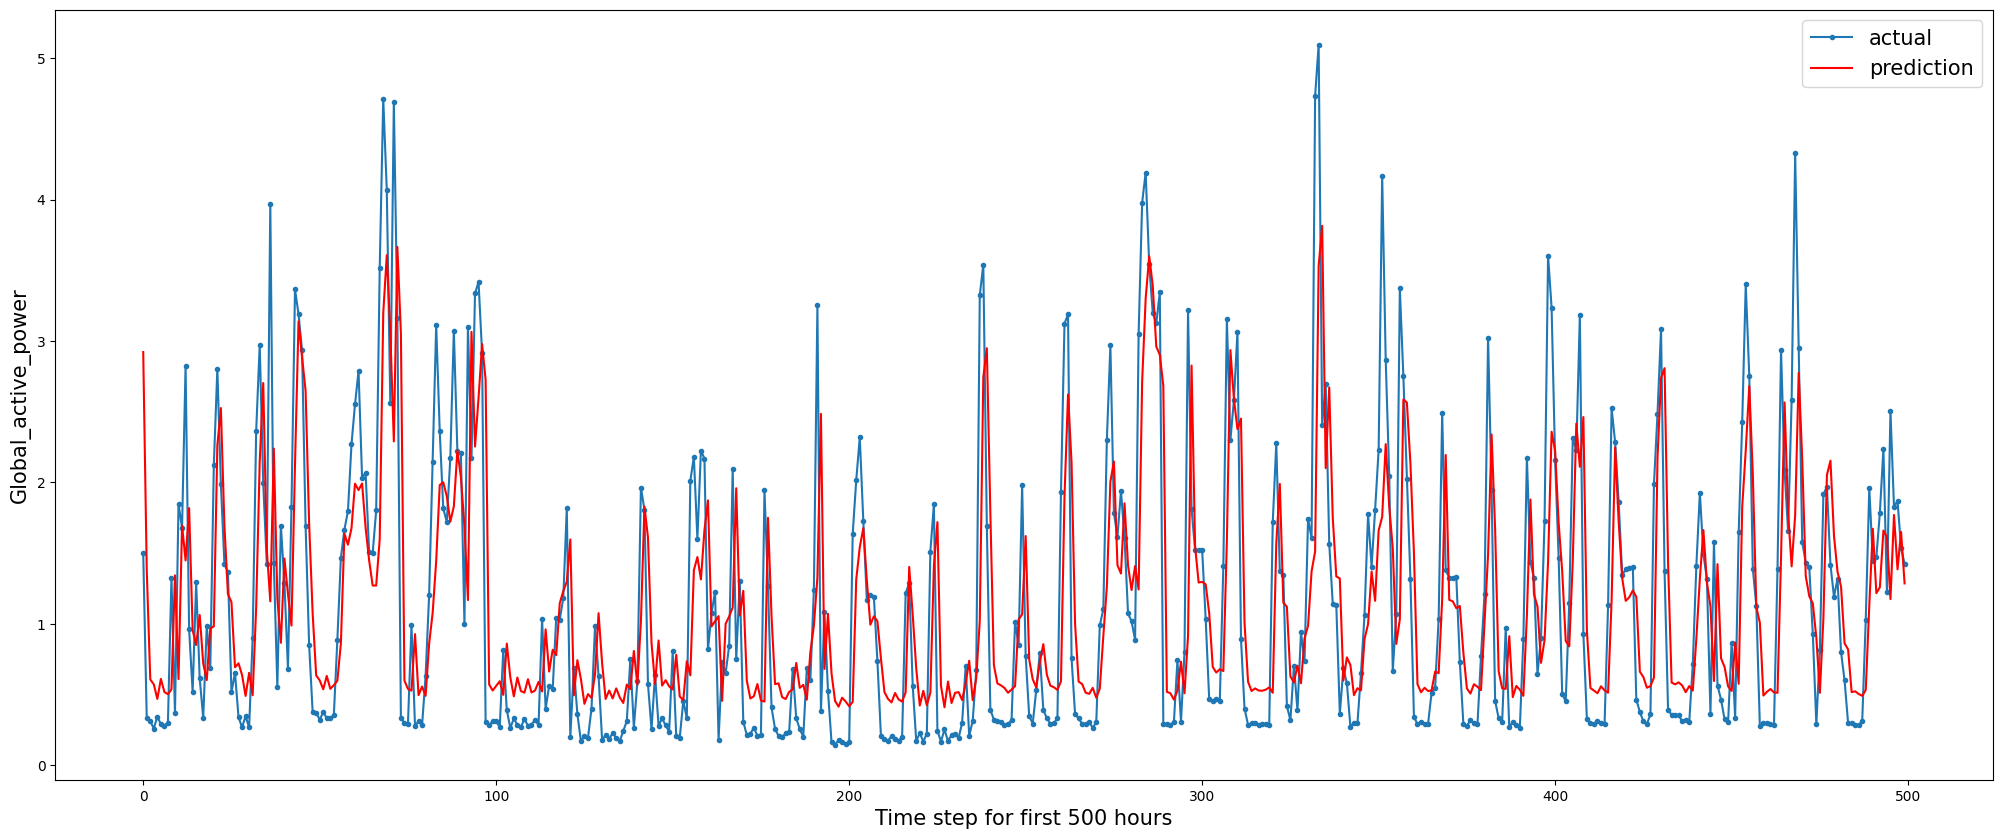

In [ ]:
aa=[x for x in range(500)]
plt.figure(figsize=(25,10))
plt.plot(aa, inv_y[:500], marker='.', label="actual")
plt.plot(aa, inv_yhat[:500], 'r', label="prediction")
plt.ylabel(df.columns[1], size=15)
plt.xlabel('Time step for first 500 hours', size=15)
plt.legend(fontsize=15)
plt.show()

In [ ]:
df_lstm = df.set_index('DateTime')
df_lstm = df_lstm.resample('h').mean()
temperatures = pd.read_csv("pre_processing/temperatures.csv")
temperatures['Date'].apply(str)
temperatures.set_index('Date')
df_lstm['Date'] = df_lstm.index.date
df_lstm['Date'].apply(str)

#df_lstm = df_lstm.merge(temperatures, how='left', left_on='Date', right_on='Date')

#df_lstm.drop()
df_lstm.head()
dict_temp = temperatures.to_dict('index')
# dict_temp
#temperatures.head(1)
#print(df_lstm)

{0: {'Date': '2006-01-02', 'min_t': 1.5, 'max_t': 7.6},
 1: {'Date': '2006-01-03', 'min_t': 3.6, 'max_t': 6.8},
 2: {'Date': '2006-01-04', 'min_t': 4.7, 'max_t': 6.9},
 3: {'Date': '2006-01-05', 'min_t': -1.1, 'max_t': 4.3},
 4: {'Date': '2006-01-06', 'min_t': 0.4, 'max_t': 1.5},
 5: {'Date': '2006-01-07', 'min_t': -2.0, 'max_t': 2.4},
 6: {'Date': '2006-01-08', 'min_t': -1.0, 'max_t': 4.7},
 7: {'Date': '2006-01-09', 'min_t': -1.6, 'max_t': 5.2},
 8: {'Date': '2006-01-10', 'min_t': -0.7, 'max_t': 8.1},
 9: {'Date': '2006-01-11', 'min_t': 0.2, 'max_t': 4.8},
 10: {'Date': '2006-01-12', 'min_t': 0.9, 'max_t': 5.7},
 11: {'Date': '2006-01-13', 'min_t': 1.0, 'max_t': 6.5},
 12: {'Date': '2006-01-14', 'min_t': 4.4, 'max_t': 4.1},
 13: {'Date': '2006-01-15', 'min_t': 5.9, 'max_t': 8.6},
 14: {'Date': '2006-01-16', 'min_t': 4.9, 'max_t': 6.5},
 15: {'Date': '2006-01-17', 'min_t': 9.8, 'max_t': 7.0},
 16: {'Date': '2006-01-18', 'min_t': 10.0, 'max_t': 9.8},
 17: {'Date': '2006-01-19', 'min_t'